# proton2.1 efficiency for neutrons
* neutron energy sampled from a $^{252}$Cf spectrum
* energy threshold for detection is set by 
    1. empirical fit to $\gamma$-detection data with $^{22}$Na source
    2. rough proton scintillation quenching factor at a few hundred keV of 0.15

In [1]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python'); 
from PETsys_analysis_tools import *;
sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/PETsysAnalysis/Python/BoxSi'); 
from proto21_tools import *;
%config InlineBackend.figure_format = 'retina'

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.1/Geant4Sims/'

In [35]:
primaries = pd.read_csv(main_data_path + 'neutron_primaries_Cf252Spectrum_500k_events.csv')

In [36]:
detected = primaries[primaries.NScintillatorsFired>0]
detected_once = primaries[primaries.NScintillatorsFired==1]
detected_more_than_once = primaries[primaries.NScintillatorsFired>1]

In [37]:
p = float(len(detected))/len(primaries)
err = p*np.sqrt(1./len(detected) + 1./len(primaries))
P_detection = p
P_detection_err_dw = np.min([p, err])
P_detection_err_up = np.min([1-p, err])

p = float(len(detected_more_than_once))/len(detected)
if p>0:
    err = p*np.sqrt(1./len(detected_more_than_once) + 1/len(detected))
else:
    err = p
P_CrossTalk = p
P_CrossTalk_err_dw = np.min([p, err])
P_CrossTalk_err_up = np.min([1-p, err])

In [38]:
if abs(P_detection_err_dw-P_detection_err_up)>0.01:
    print 'neutron efficiency: $%.1f^{+%.1f}_{-%.1f}'%(100*P_detection,100*P_detection_err_dw,100*P_detection_err_up),'%$'
else:
    print 'neutron efficiency: $%.2f\pm%.2f'%(100*P_detection,100*P_detection_err_dw),'%$'
    
if abs(P_CrossTalk_err_dw-P_CrossTalk_err_up)>0.01:
    print 'neutron cross talk probability: $%.1f^{+%.1f}_{-%.1f}'%(100*P_CrossTalk,100*P_CrossTalk_err_dw,100*P_CrossTalk_err_up),'%$'
else:
        print 'neutron cross talk probability: $%.1f\pm%.1f'%(100*P_CrossTalk,100*P_CrossTalk_err_dw),'%$'

neutron efficiency: $1.58\pm0.02 %$
neutron cross talk probability: $0.0\pm0.0 %$


## efficiency as a function of angles

In [50]:
bins = (np.linspace(5,175,35),np.linspace(-180,180,35))
hgen,edges_x,edges_y = np.histogram2d(primaries['theta_i/deg'],primaries['phi_i/deg'],bins=bins);
hdet1,edges_x,edges_y = np.histogram2d(detected_once['theta_i/deg'],detected_once['phi_i/deg'],bins=bins);
heff1 = hdet1/hgen
hdet2,edges_x,edges_y = np.histogram2d(detected_more_than_once['theta_i/deg'],detected_more_than_once['phi_i/deg'],bins=bins);
heff2 = hdet2/hgen

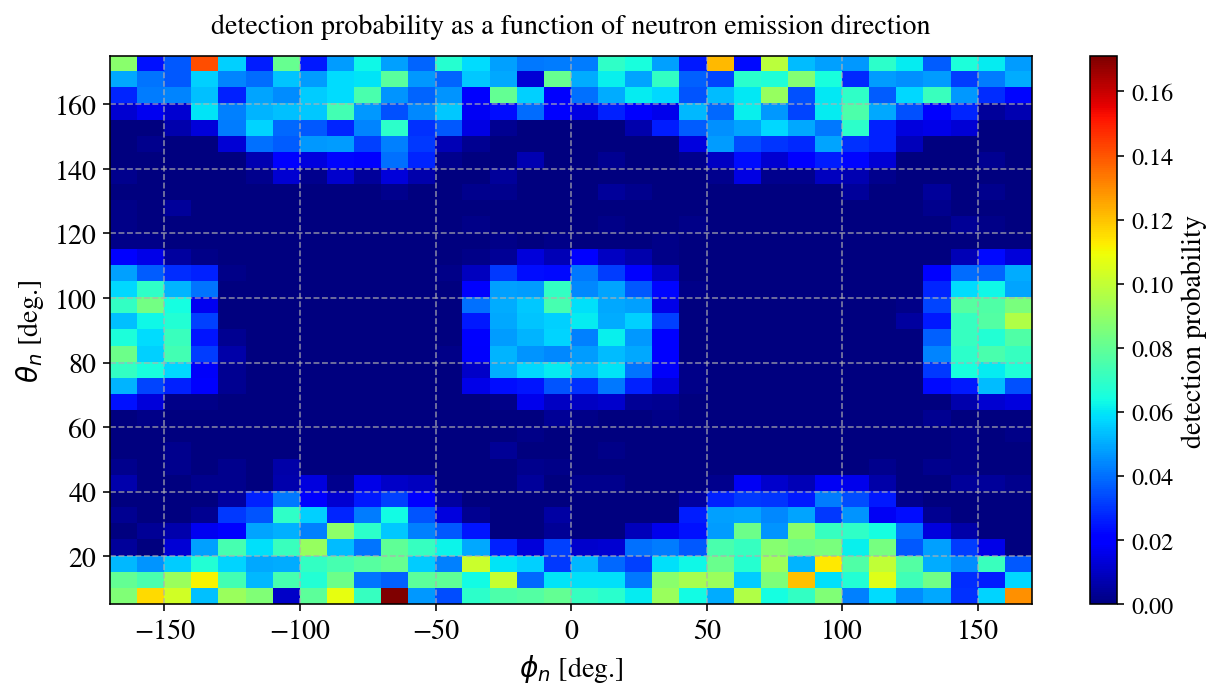

In [53]:
fig=plt.figure(figsize=(9,5));
ax = fig.add_subplot(1,1,1);
# fig=plt.figure(figsize=(12,5));
# ax = fig.add_subplot(1,2,1);
plt.imshow(heff1,extent=(-170,170,5,175),cmap='jet')
set_axes(ax,x_label='$\\phi_n$ [deg.]',
         y_label='$\\theta_n$ [deg.]',
         title='detection probability as a function of neutron emission direction',
         do_add_grid=True,do_add_legend=False,fontsize=14);
cbar=plt.colorbar()
cbar.set_label(label='detection probability',fontsize=14)
cbar.ax.tick_params(labelsize='large')

# ax = fig.add_subplot(1,2,2);
# plt.imshow(heff2,extent=(-170,170,5,175))
# set_axes(ax,x_label='$\\phi_n$ [deg.]',y_label='$\\theta_n$ [deg.]',title='cross-talk probability',
#          do_add_grid=True,do_add_legend=False,fontsize=14);
# cbar=plt.colorbar()
# cbar.set_label(label='cross-talk probability',fontsize=14)
# cbar.ax.tick_params(labelsize='large')

plt.tight_layout()

## efficiency as a function of the neutron energy

In [41]:
bins = np.linspace(0.,8.,35)
hgen,edges = np.histogram(primaries['Ek_i/MeV'],bins=bins);
hgen = np.array(hgen,dtype=np.float)
hgen_err = np.sqrt(hgen)
centers = (edges[:-1]+edges[1:])/2

hdet1,edges = np.histogram(detected_once['Ek_i/MeV'],bins=bins);
hdet1 = np.array(hdet1,dtype=np.float)
heff1 = hdet1/hgen
heff1_err = heff1*np.sqrt(1./hdet1 + 1./hgen)

hdet2,edges = np.histogram(detected_more_than_once['Ek_i/MeV'],bins=bins);
hdet2 = np.array(hdet2,dtype=np.float)
heff2 = hdet2/hgen
heff2_err = heff2*np.sqrt(1./hdet2 + 1./hgen)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in multiply
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


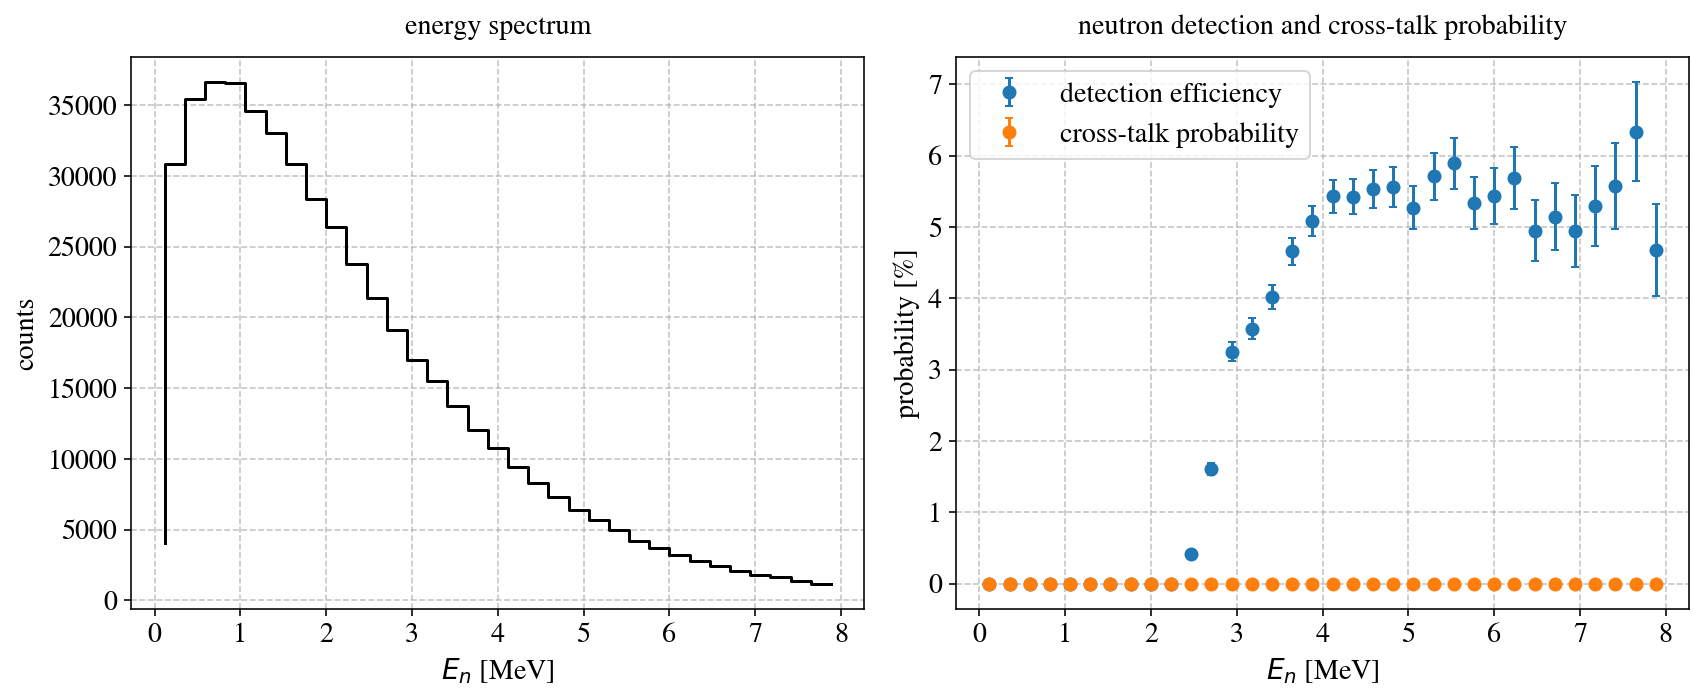

In [42]:
fig=plt.figure(figsize=(12,5));
ax = fig.add_subplot(1,2,1);

plt.step(centers,hgen,color='k')
# plt.errorbar(centers,hgen,hgen_err , linestyle='None',  marker='o', capsize=2)
set_axes(ax,x_label='$E_n$ [MeV]',y_label='counts',title='energy spectrum',
         do_add_grid=True,do_add_legend=False,fontsize=14);

ax = fig.add_subplot(1,2,2);
plt.errorbar(centers, 100.*heff1, 100.*heff1_err, label='detection efficiency'  , linestyle='None',  marker='o', capsize=2)
plt.errorbar(centers, 100.*heff2, 100.*heff2_err, label='cross-talk probability' , linestyle='None',  marker='o', capsize=2)
set_axes(ax,x_label='$E_n$ [MeV]',y_label='probability [%]',
         title='neutron detection and cross-talk probability',
         do_add_grid=True,do_add_legend=True,fontsize=14);
plt.tight_layout()